In [2]:
import numpy as np # библиотека расширенной математики
import matplotlib as mp # библиотека рисования растровых графиков
import sklearn as sk # библиотека методов машинного обучения
from matplotlib import pyplot as plt # создаём короткий псевдоним
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2s


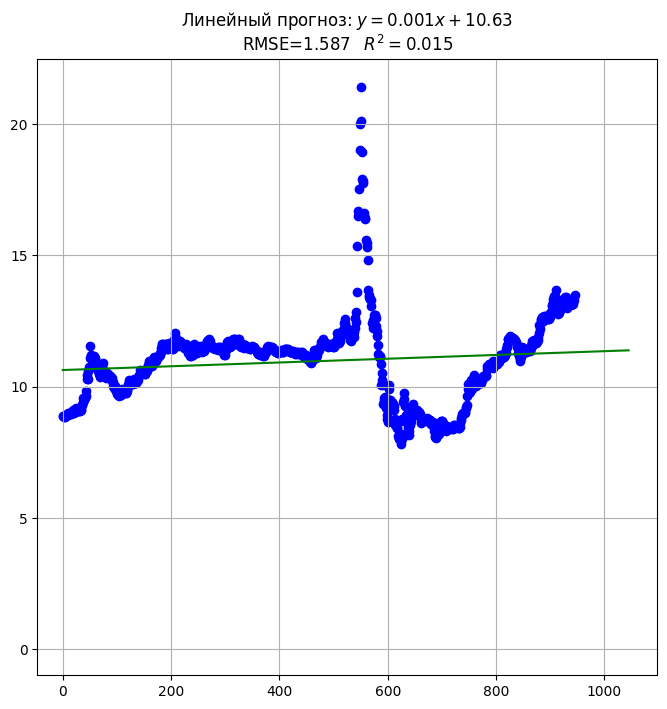

In [3]:
X=[] # создаем пустой массив значений X
Y=[] # создаем пустой массив значений Y
data = open('CNYRUB_TOM5.csv') # открываем файл на чтение
i = 0 # счётчик элементов выборки
while True: # до тех пор пока файл не закончится
    line = data.readline() # считываем строку
    if not line: # если не удалось (закончился файл)
        data.close() # закрываем файл
        break # и прерываем цикл чтения
    else: # если удалось (файл ещё не закончился)
        Y.append([float(line)]) # добавляем значение функции в массив
        X.append([i]) # добавляем значение аргумента в массив
        i = i + 1 # подсчитываем объём выборки
n = np.size(Y) # определяем размер выборки
for i in range(n, n+100): # для следующих ста элементов
            X.append([i]) # добавляем значение аргумента в массив
reg = LR().fit(X[:n], Y) # запускаем подбор коэффициенов методом ОПГ
R = reg.predict(X) # формируем прогноз по подобранным коэффициентам
a = np.round((reg.coef_[0][0]),3) # получаем коэффициент наклона
b = np.round((reg.intercept_[0]),3) # получаем высоту над осью OX
RMSE = np.round(mse(R[:n], Y)**0.5,3) # получаем среднеквадратичную ошибку
R2 = np.round(r2s(Y, R[:n]),3) # получаем коэффициент детерминации
# формируем строку подписи
t = 'Линейный прогноз:'+'$\;y=$'+str(a)+'$x+'+str(b)+'$\n'
t = t + 'RMSE='+str(RMSE)+'$\;\;\;R^2=$'+str(R2)

fig, ax = plt.subplots(figsize = (8, 8)) # график, размер в десятках процентов экрана
ax.plot(R, c = 'g') # нарисовать зелёный график уравнения регрессии
ax.scatter(X[:n], Y, c ='b') # построить точки значений выборки синего цвета
ax.grid() # нарисовать координатную сетку
ax.set_title(t) # подписать заголовок графика
ax.set_xlim(0-int(n*0.05), int((n+100)*1.05)) # отображение по оси X (от; до)
ax.set_ylim(0-int(np.max(Y)*0.05), np.max(Y)*1.05) # отображение по оси Y (от; до)
plt.show() # показать, что получилось

